# animelytics! >///<
    CIS 545 | Carol Li | 10501401

### project structure, information
#### structure
1. **exploratory data analysis:** statistics, average, genre, ratings.
2. **feature selection and engineering**
    * drop unecessary columns with unecessary features
3. **modelling**
    * baseline model: linear regression.
    * comparison model: NN (?) decide when get here lol

#### links
https://www.kaggle.com/azathoth42/myanimelist

**using:**
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

submission requires presentation, blog post, or session with craig.

## **0.** Packages and Data

In [6]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from matplotlib import rcParams

# graph display
import joblib
import pydot
from IPython.display import Image

In [12]:
# loading animelist data
# TODO: find use for this ;-;
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

username  anime_id  my_watched_episodes my_start_date  \
0                 karthiga        21                  586    0000-00-00   
1                 karthiga        59                   26    0000-00-00   
2                 karthiga        74                   26    0000-00-00   
3                 karthiga       120                   26    0000-00-00   
4                 karthiga       178                   26    0000-00-00   
...                    ...       ...                  ...           ...   
31284025     Yokonightcore     15611                   48    2014-00-00   
31284026     Yokonightcore     27815                   22    0000-00-00   
31284027            wargod      5945                   39    0000-00-00   
31284028  JMc_SetoKai_LoVe      1316                   52    0000-00-00   
31284029    hinogurl_mikha      1744                   58    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00         7          2            NaN                 0   
2            0000-00-00         7          2            NaN                 0   
3            0000-00-00         7          2            NaN                 0   
4            0000-00-00         7          2            0.0                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         9          1            NaN                 0   
31284026     0000-00-00         9          1            NaN                 0   
31284027     0000-00-00         8          2            0.0                 0   
31284028     0000-00-00         9          2            NaN                 0   
31284029     0000-00-00        10          1            0.0                 0   

              my_last_updated my_tags  
0         2013-03-03 10:52:53     NaN  
1         2013-03-10 13:54:51     NaN  
2         2013-04-27 16:43:35     NaN  
3         2013-03-03 10:53:57     NaN  
4         2013-03-27 15:59:13     NaN  
...                       ...     ...  
31284025  2015-09-07 17:33:03     NaN  
31284026  2015-09-07 17:32:05     NaN  
31284027  2010-03-29 04:24:12     NaN  
31284028  2009-12-23 05:45:14     NaN  
31284029  2008-04-05 11:36:20     NaN  

[31284030 rows x 11 columns]

In [8]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

**notes on columns:**
* rating refers to maturity rating
* scored by refers to number of ratings for data

In [10]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [51]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)
    
# TODO: want to split by each individual value and put into separate columns - is this possible? -> look at tds link

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

Slice of Life, Comedy, Romance, School
***
Slice of Life, Supernatural
***
Harem, Music, Comedy, Romance, Shoujo
***
Mystery, Drama, Romance
***
Comedy, Ecchi, Harem, Romance, Shounen
***
Action, Adventure, Mystery, Comedy, Seinen
***
Comedy, Harem, Hentai
***
Adventure, Comedy, Drama, Fantasy
***
Action, Sci-Fi, Comedy
***
Ecchi, Parody, Romance, Seinen
***
Action, Samurai, Historical, Drama, Shounen
***
Comedy, Kids, Super Power
***
Fantasy, Magic, Slice of Life
***
Adventure, Mecha, Sci-Fi, Shoujo
***
Sci-Fi, Fantasy
***
Action, Comedy, Ecchi, Sci-Fi
***
Harem, Music, Ecchi, Fantasy, Seinen
***
Fantasy, Supernatural, Comedy, Parody, Shounen
***
Action, Drama, Mecha, Military, Sci-Fi
***
Comedy, Parody, School
***
Slice of Life, Comedy, Sports
***
Action, Adventure, Romance, Martial Arts, Fantasy
***
Comedy
***
Romance, School
***
Action, Adventure, Comedy, Kids, Fantasy
***
Fantasy
***
Action, Mecha, Military, Sci-Fi
***
Action, Military, Supernatural, Drama, Vampire, Shounen
***
Co

Space, Mecha, Military, Sci-Fi, Shounen
***
Action, Adventure, Mystery, Comedy, Seinen
***
Slice of Life, Comedy, School
***
Adventure, Comedy, Historical, Romance, Sci-Fi
***
Game, Slice of Life, Comedy
***
Game, Comedy
***
Comedy, Kids
***
Kids
***
Adventure, Comedy, Drama, Kids, Sci-Fi
***
Action, Adventure, Magic, Fantasy
***
Action, Ecchi, Comedy, Sci-Fi
***
Action, Mystery, Supernatural
***
Adventure, Historical, Drama
***
Horror, Mystery, Supernatural, Vampire
***
Adventure, Fantasy, Kids, Slice of Life
***
Action, Adventure, Comedy, Kids, Mecha, Sci-Fi, Shounen, Super Power
***
Action, Adventure, Ecchi, Fantasy
***
Comedy, Romance, Yaoi
***
Comedy
***
Action, Adventure, Slice of Life, Super Power
***
Slice of Life, Comedy, Ecchi
***
Comedy
***
Hentai
***
Dementia, Horror, Supernatural
***
Action, Military, Sci-Fi, Slice of Life, School
***
Action, Adventure, Supernatural, Shounen
***
Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Mecha, Shounen
***
Drama, Romance, Slice o

***
Super Power, Drama, School
***
Music, Comedy
***
Music
***
Action, Sci-Fi, Mecha
***
Slice of Life, Comedy, School, Seinen
***
Comedy, School, Shounen, Sports
***
Comedy, Drama, Ecchi, School
***
Adventure, Fantasy
***
Sci-Fi, Adventure, Mystery, Dementia, Police, Psychological, Thriller, Mecha
***
Action, Adventure, Fantasy, Romance, Sci-Fi
***
Action, Ecchi, Comedy
***
Action, Adventure, Magic, Fantasy
***
Action, Game, Shounen
***
Drama, Romance, Slice of Life
***
Comedy, Romance, Sci-Fi
***
Slice of Life, Comedy, School
***
Action, Comedy, Drama, Josei, Supernatural, Vampire
***
Adventure, Comedy, Ecchi, Fantasy, Historical
***
Action, Mecha, Super Power, Sci-Fi
***
Comedy, Magic
***
Demons, Magic, Romance, Shoujo
***
Fantasy, Kids, Psychological, Slice of Life
***
Military, Sci-Fi, Space, Drama, Mecha
***
Comedy, Magic
***
Slice of Life, Seinen
***
Adventure, Drama, Sci-Fi, Slice of Life
***
Dementia, Drama, Historical, Psychological
***
Comedy, Historical, Romance, Supernatur

***
Music, Comedy
***
Slice of Life
***
Demons, Supernatural
***
Action, Supernatural, Fantasy
***
Comedy, Drama, Romance
***
Romance, Supernatural, Comedy, Historical, Drama
***
Comedy, Harem, Romance, School
***
Kids, Slice of Life, Comedy, Historical, School, Shoujo
***
Comedy, Romance, Sci-Fi
***
Action, Drama, Sci-Fi, Space
***
Action, Comedy, Supernatural, Romance, School
***
Action, Adventure, Fantasy, Military
***
Action, Drama, Mecha, Sci-Fi, Shounen
***
Action, Adventure, Fantasy, Game, Magic
***
Hentai
***
Action, Fantasy
***
Slice of Life, Comedy, Kids
***
Comedy, Horror
***
Action, Martial Arts, School
***
Action, Comedy, Mystery, Shounen
***
Music, Slice of Life, School, Shoujo
***
Slice of Life, Comedy, School
***
Action, Comedy, Drama, Ecchi, Fantasy, Horror, Magic, Shounen
***
Mystery, Psychological, Supernatural
***
Adventure, Fantasy, Kids
***
Action, Sci-Fi, Super Power
***
Military, Sci-Fi, Space, Drama, Romance, Mecha
***
Action, Adventure, Comedy, Demons, Fantasy

Action, Adventure, Fantasy
***
Ecchi
***
Slice of Life, Comedy, Parody
***
Action, Adventure, Psychological, Sci-Fi
***
Action, Military, Fantasy, Mecha, Shounen
***
Action, Military, Sci-Fi, Super Power, Mecha, School
***
Comedy, School, Shounen, Sports
***
Comedy, Sports, Drama, Romance, School, Shounen
***
Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power
***
Sci-Fi, Comedy, Shounen
***
Comedy, Magic, Romance, Seinen, Supernatural
***
Ecchi, Comedy, Harem, Romance, Demons, School
***
Action, Sci-Fi, Adventure, Police, Mecha
***
Action, Mystery, Horror, Supernatural, Seinen
***
Hentai
***
Comedy, Historical
***
Mystery, Police, Psychological, Supernatural, Thriller, Shounen
***
Action, Adventure, Sci-Fi, Shounen, Super Power
***
Action, Adventure, Fantasy, Game
***
Action, Mecha, Military
***
Adventure, Seinen
***
Adventure, Comedy, Drama, Fantasy, Kids
***
Mecha, Romance, Sci-Fi
***
Music, Magic, Romance, School
***
Slice of Life, Comedy, Drama, Romance, Shoujo


Action, Military, Super Power, Mecha, School
***
Magic, Shoujo
***
Comedy
***
Drama, Romance, School
***
Action, Supernatural, Vampire, Seinen
***
Slice of Life, Romance
***
Comedy, Mecha, Police, Sci-Fi
***
Music, Slice of Life, Shoujo
***
Demons, Historical, Military, Romance, Seinen, Supernatural
***
Action, Sci-Fi, Adventure, Space, Comedy
***
Comedy, School, Shounen, Supernatural
***
Comedy, Romance
***
Mystery, Comedy, Horror, Psychological, Drama
***
Mystery, Comedy
***
Action, Ecchi, Martial Arts
***
Slice of Life, Comedy, Josei
***
Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power
***
Comedy, Seinen, Slice of Life
***
Harem, Hentai
***
Action, Comedy, Mecha, Parody, Sci-Fi, Shounen
***
Comedy, Dementia, Slice of Life
***
Fantasy, Kids, Magic, Romance, Shoujo, Super Power
***
Action, Adventure, Fantasy, Romance, Supernatural, Drama, Mystery, Shounen
***
Ecchi, School, Shounen
***
Action, Mystery, Supernatural
***
Hentai
***
Comedy, Fantasy, Kids
***
Comedy, Drama,

***
Comedy, Mecha, Parody
***
Hentai
***
Slice of Life, Psychological, Drama, Romance, Seinen
***
Music
***
Music
***
Action, Adventure, Fantasy, Magic, Shounen
***
Action, Sci-Fi, Super Power, Drama, Romance
***
Comedy, Slice of Life
***
Action, Adventure, Sci-Fi, Shounen, Super Power
***
Comedy, School, Slice of Life
***
Action, Drama, Romance, Sci-Fi
***
Drama, Romance, Slice of Life
***
Ecchi, Parody, Seinen
***
Action, Sci-Fi, Parody, Mecha
***
Romance, Shoujo
***
Action, Sci-Fi, Adventure, Mecha
***
Adventure
***
Comedy, Sports
***
Slice of Life, Historical, Drama, Romance, Seinen
***
Romance, School
***
Comedy, Parody, Sci-Fi
***
Slice of Life, Comedy
***
Comedy, Kids, Sci-Fi, Shounen
***
Comedy, Sci-Fi
***
Action, Mystery, Horror, Supernatural, Seinen
***
Action, Comedy, Fantasy, Shounen, Super Power, Supernatural, Vampire
***
Harem, Comedy, Romance, Ecchi, Vampire, Fantasy, School, Shounen
***
Adventure, Drama, Fantasy, Horror, Magic, Music, Sci-Fi, Supernatural
***
Mecha, Mil

***
Mystery, Comedy, Romance
***
Sci-Fi, Slice of Life, Comedy
***
Comedy, Parody, School
***
Action, Supernatural, Vampire
***
Adventure, Comedy, Drama, Sci-Fi, Shounen, Space
***
Comedy, School, Super Power
***
Adventure, Mystery, Comedy, Supernatural
***
Action, Adventure, Comedy, Drama
***
Adventure, Comedy, Mecha, Military, Sci-Fi
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Romance, Mecha
***
Psychological, Drama, Fantasy, School, Seinen, Shoujo Ai
***
Action, Adventure, Fantasy, Kids
***
Slice of Life, Drama, Romance
***
Adventure, Comedy, Demons, Magic, Fantasy, Shounen
***
Action, Game, Adventure, Comedy, Parody
***
Action, Comedy, Fantasy
***
Drama, Mystery, Seinen, Supernatural
***
Magic, Shoujo
***
Action, Dementia, Drama, Horror, Martial Arts, Psychological, Seinen
***
Fantasy, Game, Magic, Music
***
Slice of Life, Comedy, Parody
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Comedy, Historical
***
Action, Super Power, Military, Supernatural, Horror, Vampire

In [52]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

Madhouse
***
Sunrise
***
Gathering
***
Studio Ghibli
***
J.C.Staff
***
Imagin
***
Studio Deen
***
Production I.G
***
Production I.G
***
Gonzo
***
Xebec
***
Gonzo
***
Studio Pierrot
***
Sunrise
***
Kachidoki Studio
***
Diomedea
***
Madhouse
***
Tezuka Productions
***
Madhouse
***
Shin-Ei Animation
***
Hoods Entertainment
***
AIC Plus+
***
MAPPA
***
Nippon Animation
***
OLM
***
Tatsunoko Production
***
Gainax
***
Studio Pierrot, Studio Gallop
***
Brain&#039;s Base
***
Manglobe
***
Studio Pierrot
***
Toei Animation
***
Daume
***
Diomedea
***
10Gauge
***
AIC Plus+
***
Seven Arcs Pictures
***
Seven Arcs Pictures
***
Marza Animation Planet
***
Manglobe
***
Sunrise
***
Toei Animation
***
Haoliners Animation League
***
Studio Hibari
***
Studio Gallop, Studio Deen
***
Zexcs
***
J.C.Staff
***
Sunrise
***
Ordet, LIDENFILMS
***
Studio Comet
***
Y.O.U.C
***
Silver Link.
***
Silver Link.
***
Bones
***
Studio Gallop
***
J.C.Staff
***
TMS Entertainment
***
MAPPA
***
AIC
***
Madhouse, Studio Deen, Magi

Sotsu
***
TYO Animations
***
Tezuka Productions
***
Bones
***
Zexcs
***
Bones
***
AIC
***
DLE
***
J.C.Staff
***
Steve N&#039; Steven, Rockwell Eyes
***
Satelight
***
Daume
***
Studio Pierrot
***
PoRO
***
AIC
***
Studio Pierrot
***
Brain&#039;s Base, Studio A-CAT
***
Nomad
***
Studio 1st
***
J.C.Staff
***
Madhouse
***
Silver Link.
***
Xebec
***
Arms
***
Mushi Production
***
Production I.G
***
Office Takeout
***
Seven Arcs Pictures
***
Nippon Animation
***
Sunrise
***
OLM
***
Studio Deen
***
KOO-KI
***
Zexcs
***
Tokyo Kids
***
Production I.G
***
Studio Pierrot
***
P.A. Works
***
Studio Deen
***
Sunrise
***
Production I.G
***
Shuka
***
Ordet, Encourage Films
***
DLE
***
Brain&#039;s Base
***
Nippon Animation
***
Ajia-Do
***
OLM
***
Jumondo
***
Oddjob
***
Studio Ghibli, Studio Hibari
***
Production Reed, Asahi Production
***
Sunrise
***
Trigger
***
Gainax
***
Vega Entertainment
***
Green Bunny
***
Gainax, feel.
***
Brain&#039;s Base
***
JCF
***
ufotable
***
Ordet, SANZIGEN
***
Orange
***
X

***
A-1 Pictures
***
Arms
***
Toei Animation
***
Bones
***
Zexcs
***
Kyoto Animation
***
Gainax
***
Fanworks, Imagineer
***
ILCA
***
Three-d
***
Gainax, Tatsunoko Production
***
Silver Link.
***
Studio Pierrot
***
Xebec
***
Bones
***
Studio Comet
***
Sunrise
***
Sunrise
***
Studio 9 MAiami
***
Nomad
***
AIC
***
A.C.G.T.
***
Doga Kobo
***
Kyoto Animation, Animation Do
***
Manglobe
***
CoMix Wave Films
***
Gonzo
***
Seven
***
PoRO
***
Production Reed
***
Production Reed
***
OLM
***
Ajia-Do
***
A-1 Pictures
***
J.C.Staff
***
Nippon Animation
***
Kyoto Animation
***
Zexcs
***
AIC
***
Kamikaze Douga
***
Satelight
***
Millepensee
***
Production I.G
***
Platinum Vision
***
Toei Animation
***
Kachidoki Studio
***
OLM
***
OLM
***
Studio Junio, Annapuru
***
Triangle Staff
***
Studio Pierrot
***
Production I.G, M.S.C
***
Studio Bogey
***
Nippon Animation
***
Sunrise
***
Studio Pierrot, Pierrot Plus
***
TMS Entertainment
***
Studio Pierrot
***
OLM
***
TMS Entertainment, Tokyo Kids, Minami Machi Bu

***
Shaft
***
Diomedea
***
SynergySP
***
Brain&#039;s Base
***
Studio Rikka
***
J.C.Staff
***
Tatsunoko Production
***
Production I.G
***
Tezuka Productions
***
Xebec
***
J.C.Staff
***
Suzuki Mirano
***
TYO Animations
***
J.C.Staff
***
A-1 Pictures
***
Toei Animation
***
J.C.Staff
***
GoHands
***
Tezuka Productions
***
Gonzo, AIC
***
Trans Arts
***
TMS Entertainment
***
ufotable
***
Brain&#039;s Base
***
Silver Link.
***
J.C.Staff
***
Diomedea
***
Xebec
***
Madhouse
***
Toei Animation
***
Studio Gallop
***
Production I.G
***
Tatsunoko Production
***
Sunrise
***
Flavors Soft
***
Asread
***
ufotable
***
Madhouse
***
Kinema Citrus
***
Gonzo, Satelight
***
Encourage Films
***
Toei Animation
***
Kyoto Animation
***
Bones, Production I.G, Studio 4°C, Toei Animation
***
Madhouse
***
Toei Animation
***
A-1 Pictures, Ordet
***
B&amp;T
***
Toei Animation
***
Gonzo
***
TMS Entertainment
***
Group TAC
***
Studio Deen
***
Toei Animation
***
A-1 Pictures
***
OLM
***
Actas
***
Toei Animation
***
Prod

Bones
***
Toei Animation
***
Hal Film Maker
***
Genco, Radix
***
DLE
***
Xebec
***
Toei Animation
***
Polygon Pictures
***
Kyoto Animation
***
Gainax
***
GoHands
***
Production I.G
***
TMS Entertainment
***
A.C.G.T.
***
Group TAC
***
AIC Build
***
Sunrise
***
Telecom Animation Film
***
feel.
***
Madhouse
***
Gainax
***
J.C.Staff
***
Sunrise
***
Studio Deen
***
Toei Animation
***
Studio Deen
***
OLM
***
Studio Deen
***
Seven
***
Wit Studio
***
Shaft
***
Madhouse
***
A-1 Pictures
***
J.C.Staff
***
Kinema Citrus, Orange
***
Brain&#039;s Base
***
Kyoto Animation
***
Calf Studio
***
Sunrise
***
Gainax
***
Kyoto Animation, Sunrise
***
TMS Entertainment, Jinnis Animation Studios
***
Pops Inc.
***
Ascension
***
Diomedea
***
Yumeta Company
***
Kinema Citrus
***
Gonzo
***
Shin-Ei Animation
***
Studio Fantasia
***
Madhouse
***
Science SARU
***
Studio Pierrot
***
Gonzo, Palm Studio
***
Lay-duce
***
Satelight
***
10Gauge
***
Telescreen BV
***
Haoliners Animation League
***
T-Rex
***
Gonzo
***
Studi

T-Rex
***
Tsuchida Productions
***
Phoenix Entertainment
***
EMT²
***
Studio Pierrot
***
Dynamo Pictures
***
Zexcs
***
J.C.Staff
***
Tomovies
***
J.C.Staff
***
TMS Entertainment
***
RG Animation Studios
***
L²Studio
***
Xebec
***
Silver Link.
***
Pierrot Plus
***
Toei Animation
***
Production I.G
***
Triangle Staff
***
Collaboration Works
***
Pastel
***
Chippai
***
Tokyo Kids
***
Shuka
***
Sunrise
***
Madhouse
***
Tatsunoko Production
***
Studio Sign
***
Toei Animation
***
Gathering
***
Kyotoma
***
Studio Pierrot
***
Fanworks
***
Tomoyasu Murata Company
***
Studio Gokumi
***
A-1 Pictures
***
ixtl, LIDENFILMS
***
OLM
***
Studio Ghibli
***
Graphinica
***
Studio 9 MAiami
***
Studio Deen
***
W-Toon Studio
***
Shaft
***
TMS Entertainment
***
Studio Deen
***
Toei Animation
***
Toei Animation
***
Kanaban Graphics
***
Office Takeout
***
Production I.G
***
Onionskin
***
Animate Film
***
Toei Animation
***
Studio Deen
***
Studio Colorido
***
Toei Animation
***
A-1 Pictures
***
Arms
***
Egg
***
J

***
AIC, Darts
***
Shaft
***
Studio 4°C
***
feel.
***
J.C.Staff
***
TMS Entertainment
***
Production I.G
***
Production I.G
***
Bones
***
J.C.Staff
***
L²Studio
***
Trigger
***
Trinet Entertainment
***
Yumeta Company
***
Kyoto Animation
***
Fanworks
***
Ajia-Do
***
Jinnis Animation Studios
***
Toei Animation
***
LIDENFILMS
***
feel.
***
Bee Media, 81 Produce
***
Satelight
***
Studio Pierrot
***
Doga Kobo
***
Production IMS
***
A.C.G.T.
***
Doga Kobo
***
Production Reed
***
Studio Pierrot
***
Manglobe
***
Xebec Zwei
***
Bee Train
***
Bones
***
Flavors Soft
***
Sunrise
***
Nippon Animation
***
Production I.G
***
J.C.Staff
***
Sunrise
***
Doga Kobo
***
ILCA
***
Eiken
***
Shanghai Animation Film Studio
***
OLM, OLM Digital, Sprite Animation Studios
***
DLE
***
Sunrise
***
Actas, Studio 3Hz
***
Hal Film Maker
***
Silver Link.
***
Eiken
***
Daume
***
Arms
***
Studio Comet
***
Nippon Animation
***
Studio Deen
***
Toei Animation
***
APPP
***
Madhouse
***
Studio Pierrot
***
J.C.Staff
***
Shimog

***
Production I.G, Xebec, OLM
***
BOOTLEG
***
Studio 4°C
***
Doga Kobo
***
Studio Pierrot
***
A-1 Pictures
***
Wit Studio
***
Sunrise
***
Arms
***
Studio Hibari
***
SANZIGEN, LIDENFILMS
***
Nippon Animation
***
Toei Animation
***
Team YokkyuFuman
***
Sunrise
***
Tatsunoko Production
***
Shaft
***
Production I.G
***
Studio Deen
***
Shaft
***
PoRO
***
Ordet
***
SANZIGEN, LIDENFILMS
***
ufotable
***
KIZAWA Studio
***
Mushi Production
***
Doga Kobo
***
Studio Deen
***
Seven Arcs Pictures
***
Sparkly Key Animation Studio
***
AIC
***
Sunrise
***
Kyoto Animation
***
Shin-Ei Animation
***
A-1 Pictures
***
Shaft
***
Tatsunoko Production
***
Group TAC
***
Toei Animation
***
Satelight, A-1 Pictures
***
Production Reed
***
Xebec
***
Gainax, J.C.Staff
***
ufotable
***
Production I.G
***
AIC
***
J.C.Staff
***
TMS Entertainment
***
Polygon Pictures
***
Gainax
***
Triangle Staff
***
OLM
***
Y.O.U.C
***
Studio Gokumi
***
Shaft
***
A-1 Pictures, Bridge
***
8bit
***
Studio Gokumi
***
Shaft
***
TMS Enter

Asread
***
Fukushima Gainax
***
Bee Train
***
Production IMS
***
Xebec, Issen
***
Brain&#039;s Base
***
Gainax
***
Sparkly Key Animation Studio
***
Shuka
***
Flavors Soft
***
Kyoto Animation
***
Studio Pierrot
***
Creators in Pack
***
P.A. Works
***
Daume
***
Brain&#039;s Base
***
Millepensee
***
Studio Pierrot
***
Arms
***
Toei Animation
***
OLM
***
Sunrise
***
Lerche
***
AIC
***
Xebec
***
Toei Animation
***
View Works
***
AIC
***
Shanghai Foch Film Culture Investment
***
Tatsunoko Production, Dongwoo A&amp;E
***
feel.
***
TMS Entertainment
***
Kyoto Animation
***
Tatsunoko Production
***
Bones, Kinema Citrus
***
Lilix
***
Silver Link.
***
A-1 Pictures
***
TMS Entertainment
***
Tokyo Kids
***
Animate Film
***
Minakata Laboratory
***
Madhouse
***
Sunrise
***
Manglobe
***
Studio Anima
***
Studio Comet
***
Gainax
***
TMS Entertainment
***
Xebec
***
Wit Studio
***
Asahi Production
***
Sunrise
***
J.C.Staff
***
Sunrise
***
Studio Gallop
***
Toei Animation, TMS Entertainment
***
Xebec
***
A

In [53]:
# all airing years in anime_df
for date in anime_df['aired_from_year']:
    print('***')
    print(date)

***
2012.0
***
2007.0
***
2008.0
***
2002.0
***
2012.0
***
2009.0
***
2003.0
***
2007.0
***
2008.0
***
2006.0
***
2008.0
***
2010.0
***
2011.0
***
2012.0
***
2004.0
***
2002.0
***
2009.0
***
2007.0
***
1989.0
***
2008.0
***
2011.0
***
2004.0
***
2008.0
***
2013.0
***
2006.0
***
2011.0
***
2008.0
***
2011.0
***
2009.0
***
2011.0
***
2010.0
***
1992.0
***
2001.0
***
2006.0
***
1999.0
***
2005.0
***
2006.0
***
2007.0
***
2000.0
***
2010.0
***
2010.0
***
2006.0
***
2012.0
***
2010.0
***
2007.0
***
2012.0
***
1998.0
***
2000.0
***
2011.0
***
2011.0
***
2007.0
***
2008.0
***
2006.0
***
2016.0
***
2017.0
***
2002.0
***
2015.0
***
2016.0
***
1998.0
***
2011.0
***
2000.0
***
2010.0
***
2016.0
***
2016.0
***
2013.0
***
2008.0
***
2015.0
***
1997.0
***
2018.0
***
2016.0
***
2014.0
***
1994.0
***
2010.0
***
2001.0
***
2010.0
***
2005.0
***
2006.0
***
2010.0
***
2013.0
***
2016.0
***
2004.0
***
2014.0
***
2015.0
***
2013.0
***
2017.0
***
2017.0
***
1978.0
***
2017.0
***
1997.0
***
2015.0
***
2018.0

1994.0
***
1981.0
***
2017.0
***
2007.0
***
2001.0
***
2014.0
***
2014.0
***
2012.0
***
2017.0
***
2013.0
***
2005.0
***
1993.0
***
2013.0
***
2013.0
***
2015.0
***
2011.0
***
2015.0
***
2015.0
***
1984.0
***
1990.0
***
2013.0
***
2002.0
***
1989.0
***
2011.0
***
2005.0
***
1989.0
***
1996.0
***
2016.0
***
2017.0
***
2009.0
***
1982.0
***
1987.0
***
2006.0
***
2010.0
***
2012.0
***
2016.0
***
2015.0
***
2013.0
***
2008.0
***
1995.0
***
2013.0
***
1991.0
***
2012.0
***
2010.0
***
2016.0
***
2014.0
***
2015.0
***
2005.0
***
2014.0
***
2013.0
***
2004.0
***
2009.0
***
2014.0
***
2002.0
***
2002.0
***
2017.0
***
1996.0
***
2004.0
***
2016.0
***
2016.0
***
2006.0
***
2003.0
***
1999.0
***
2009.0
***
2016.0
***
2006.0
***
2011.0
***
1985.0
***
2011.0
***
2009.0
***
2016.0
***
2015.0
***
1997.0
***
1999.0
***
2006.0
***
2013.0
***
2012.0
***
2004.0
***
2005.0
***
1998.0
***
2017.0
***
2014.0
***
2014.0
***
2007.0
***
2013.0
***
2013.0
***
2015.0
***
2004.0
***
2007.0
***
2006.0
***
1963.0
***

***
2006.0
***
2016.0
***
2011.0
***
2016.0
***
2009.0
***
2012.0
***
2009.0
***
2010.0
***
2017.0
***
2008.0
***
2013.0
***
2013.0
***
1969.0
***
2013.0
***
2011.0
***
1992.0
***
1980.0
***
1984.0
***
2011.0
***
1986.0
***
2004.0
***
2003.0
***
1984.0
***
2018.0
***
2005.0
***
2010.0
***
2007.0
***
2014.0
***
1983.0
***
2003.0
***
2018.0
***
2010.0
***
2017.0
***
2010.0
***
2016.0
***
2012.0
***
1991.0
***
2001.0
***
2003.0
***
2016.0
***
2017.0
***
1999.0
***
2018.0
***
2014.0
***
2016.0
***
2014.0
***
2014.0
***
2014.0
***
1986.0
***
2014.0
***
1978.0
***
2012.0
***
2014.0
***
2005.0
***
1992.0
***
2013.0
***
2016.0
***
1990.0
***
2014.0
***
2016.0
***
2013.0
***
2015.0
***
2007.0
***
2015.0
***
2003.0
***
2007.0
***
2015.0
***
2009.0
***
2009.0
***
2017.0
***
1973.0
***
2011.0
***
2015.0
***
2017.0
***
1991.0
***
2015.0
***
2000.0
***
1996.0
***
1980.0
***
2002.0
***
2018.0
***
2014.0
***
2003.0
***
2007.0
***
2007.0
***
2000.0
***
2002.0
***
2012.0
***
2003.0
***
2002.0
***
2009.0

***
2010.0
***
2011.0
***
2016.0
***
1979.0
***
2013.0
***
1986.0
***
2008.0
***
2015.0
***
2011.0
***
2004.0
***
2010.0
***
2013.0
***
2017.0
***
1999.0
***
2015.0
***
2004.0
***
2017.0
***
2015.0
***
2009.0
***
2003.0
***
2017.0
***
2018.0
***
2016.0
***
2013.0
***
2004.0
***
2013.0
***
1977.0
***
1990.0
***
2016.0
***
2013.0
***
1985.0
***
2014.0
***
2008.0
***
2002.0
***
2006.0
***
2012.0
***
2017.0
***
1994.0
***
2016.0
***
1997.0
***
2003.0
***
2006.0
***
2017.0
***
2000.0
***
2017.0
***
1974.0
***
2016.0
***
2014.0
***
2016.0
***
2017.0
***
2013.0
***
2010.0
***
1987.0
***
2011.0
***
1995.0
***
2005.0
***
2014.0
***
2011.0
***
2012.0
***
2010.0
***
1979.0
***
1996.0
***
2013.0
***
2003.0
***
2014.0
***
2007.0
***
2009.0
***
2015.0
***
1960.0
***
2010.0
***
2010.0
***
1988.0
***
2016.0
***
2015.0
***
1990.0
***
1977.0
***
1991.0
***
2006.0
***
1992.0
***
2015.0
***
2015.0
***
2014.0
***
1994.0
***
2006.0
***
2017.0
***
2018.0
***
2016.0
***
2015.0
***
2004.0
***
2017.0
***
2008.0

***
2014.0
***
2006.0
***
2017.0
***
2015.0
***
1987.0
***
2009.0
***
1993.0
***
2003.0
***
2013.0
***
2010.0
***
2017.0
***
2018.0
***
2017.0
***
1995.0
***
2016.0
***
2017.0
***
2014.0
***
1985.0
***
1995.0
***
2004.0
***
1985.0
***
1993.0
***
2002.0
***
2015.0
***
2005.0
***
2011.0
***
2018.0
***
2012.0
***
2014.0
***
2000.0
***
2017.0
***
2010.0
***
2014.0
***
2017.0
***
2014.0
***
2008.0
***
1994.0
***
2015.0
***
1989.0
***
2005.0
***
2008.0
***
2010.0
***
2015.0
***
1979.0
***
2017.0
***
2003.0
***
1990.0
***
2018.0
***
2017.0
***
2014.0
***
1989.0
***
2011.0
***
2007.0
***
2017.0
***
2009.0
***
2015.0
***
2011.0
***
2006.0
***
1996.0
***
1997.0
***
2003.0
***
2017.0
***
1985.0
***
2003.0
***
2015.0
***
2018.0
***
1980.0
***
1992.0
***
2017.0
***
2016.0
***
2007.0
***
2013.0
***
2011.0
***
2005.0
***
2005.0
***
2004.0
***
2015.0
***
2017.0
***
2014.0
***
2014.0
***
1999.0
***
2010.0
***
2016.0
***
2017.0
***
1996.0
***
2016.0
***
2012.0
***
2006.0
***
2015.0
***
2016.0
***
2009.0

***
1997.0
***
2009.0
***
2011.0
***
2003.0
***
2015.0
***
1991.0
***
2016.0
***
2012.0
***
1996.0
***
2015.0
***
1994.0
***
1993.0
***
2010.0
***
1993.0
***
2017.0
***
1988.0
***
1984.0
***
2011.0
***
2005.0
***
2017.0
***
2016.0
***
1983.0
***
1998.0
***
2006.0
***
2014.0
***
2012.0
***
2007.0
***
2015.0
***
2018.0
***
2008.0
***
2009.0
***
2017.0
***
1989.0
***
1969.0
***
2016.0
***
2004.0
***
2016.0
***
2003.0
***
2016.0
***
2015.0
***
1997.0
***
2000.0
***
2010.0
***
2007.0
***
2014.0
***
1997.0
***
2007.0
***
2014.0
***
2001.0
***
1996.0
***
1982.0
***
1986.0
***
2016.0
***
2003.0
***
2016.0
***
2001.0
***
2006.0
***
1981.0
***
2017.0
***
2004.0
***
2003.0
***
2011.0
***
1994.0
***
2017.0
***
2004.0
***
2017.0
***
2018.0
***
2016.0
***
2017.0
***
2014.0
***
1999.0
***
2016.0
***
2012.0
***
2017.0
***
2015.0
***
1994.0
***
2009.0
***
2001.0
***
2012.0
***
2015.0
***
2013.0
***
2009.0
***
2002.0
***
2012.0
***
2015.0
***
1994.0
***
2005.0
***
2018.0
***
2012.0
***
2012.0
***
1987.0

***
2012.0
***
2008.0
***
2004.0
***
2003.0
***
2015.0
***
2016.0
***
2002.0
***
1983.0
***
1994.0
***
2015.0
***
2011.0
***
2002.0
***
2009.0
***
2016.0
***
2000.0
***
2015.0
***
1978.0
***
2018.0
***
1989.0
***
1996.0
***
2004.0
***
2016.0
***
2007.0
***
2009.0
***
2011.0
***
2016.0
***
2004.0
***
2001.0
***
2008.0
***
2013.0
***
2017.0
***
2003.0
***
2006.0
***
2017.0
***
2009.0
***
1990.0
***
2017.0
***
2005.0
***
2018.0
***
2016.0
***
2011.0
***
2018.0
***
1981.0
***
2008.0
***
2016.0
***
1983.0
***
2005.0
***
2017.0
***
2007.0
***
1988.0
***
2006.0
***
2006.0
***
2001.0
***
2018.0
***
2012.0
***
2017.0
***
2013.0
***
2006.0
***
2014.0
***
2011.0
***
2016.0
***
1987.0
***
2007.0
***
2012.0
***
2011.0
***
1999.0
***
1990.0
***
2010.0
***
2017.0
***
2017.0
***
2014.0
***
2008.0
***
2005.0
***
1998.0
***
2015.0
***
2015.0
***
2015.0
***
2008.0
***
1991.0
***
2015.0
***
2008.0
***
2008.0
***
1983.0
***
2011.0
***
2012.0
***
2001.0
***
1998.0
***
2000.0
***
2008.0
***
2011.0
***
2014.0

2016.0
***
1996.0
***
1986.0
***
2016.0
***
2000.0
***
2014.0
***
1992.0
***
2017.0
***
2014.0
***
1994.0
***
2016.0
***
2018.0
***
2014.0
***
2016.0
***
2002.0
***
2009.0
***
2009.0
***
2002.0
***
1993.0
***
2017.0
***
2014.0
***
2015.0
***
2004.0
***
2001.0
***
1992.0
***
2016.0
***
1975.0
***
2012.0
***
2012.0
***
1999.0
***
2015.0
***
1987.0
***
2016.0
***
2014.0
***
2006.0
***
2006.0
***
1999.0
***
2018.0
***
2018.0
***
2014.0
***
2006.0
***
2015.0
***
2016.0
***
2013.0
***
2016.0
***
1981.0
***
2004.0
***
1991.0
***
2015.0
***
1991.0
***
2014.0
***
2016.0
***
2016.0
***
2016.0
***
2008.0
***
2005.0
***
2006.0
***
1996.0
***
2012.0
***
2015.0
***
1995.0
***
2012.0
***
2001.0
***
2002.0
***
2018.0
***
2002.0
***
2017.0
***
2013.0
***
2010.0
***
2016.0
***
1987.0
***
2001.0
***
1995.0
***
2003.0
***
2013.0
***
2009.0
***
2017.0
***
2005.0
***
2006.0
***
2014.0
***
2014.0
***
2011.0
***
2003.0
***
1996.0
***
2015.0
***
2016.0
***
2005.0
***
2017.0
***
2004.0
***
2010.0
***
1990.0
***

### Merging AnimeList and Anime Stats

Joining on shared column, `anime_id`.

We want to conduct analysis on user ratings on different anime. `animelist_df` contains user Anime Lists, where they rate the anime that they've watched.


In [108]:
merged_anime_df = pd.merge(animelist_df, anime_df, on='anime_id')
merged_anime_df

username  anime_id  my_watched_episodes my_start_date  \
0              karthiga        21                  586    0000-00-00   
1             Damonashu        21                  418    0000-00-00   
2                 bskai        21                   75    0000-00-00   
3                Slimak        21                  834    0000-00-00   
4         MistButterfly        21                  808    0000-00-00   
...                 ...       ...                  ...           ...   
31284025     animekanji     37896                    0    2018-05-19   
31284026      AnimeKhor     37896                    0    0000-00-00   
31284027         FeliX_     37620                    0    0000-00-00   
31284028    gasparsousa     37620                    0    0000-00-00   
31284029         Azurii     36818                    0    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00        10          1            0.0                 0   
2            0000-00-00         8          1            0.0                 0   
3            0000-00-00        10          1            0.0                 0   
4            0000-00-00         0          1            NaN                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         0          1            0.0                 0   
31284026     0000-00-00         0          6            0.0                 0   
31284027     0000-00-00         0          6            0.0                 0   
31284028     0000-00-00         0          6            0.0                 0   
31284029     0000-00-00         0          6            0.0                 0   

              my_last_updated  ...               broadcast  \
0         2013-03-03 10:52:53  ...  Sundays at 09:30 (JST)   
1         2009-09-30 07:39:05  ...  Sundays at 09:30 (JST)   
2         2010-06-15 21:31:23  ...  Sundays at 09:30 (JST)   
3         2018-05-01 12:05:21  ...  Sundays at 09:30 (JST)   
4         2018-04-04 20:55:34  ...  Sundays at 09:30 (JST)   
...                       ...  ...                     ...   
31284025  2018-05-19 10:41:31  ...                     NaN   
31284026  2018-05-18 14:58:34  ...                     NaN   
31284027  2018-04-22 17:58:24  ...                     NaN   
31284028  2018-04-23 02:30:52  ...                     NaN   
31284029  2017-11-22 00:25:32  ...                     NaN   

                                                    related  \
0         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
1         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
2         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
3         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
4         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
...                                                     ...   
31284025  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284026  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284027  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284028  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284029                                                 []   

                                                   producer  \
0                                    Fuji TV, TAP, Shueisha   
1                                    Fuji TV, TAP, Shueisha   
2                                    Fuji TV, TAP, Shueisha   
3                                    Fuji TV, TAP, Shueisha   
4                                    Fuji TV, TAP, Shueisha   
...                                                     ...   
31284025                                              iQIYI   
31284026                                              iQIYI   
31284027  Tencent Penguin Pictures, China Literature Lim...   
31284028  Tencent Penguin Pictures, China Lit

In [ ]:
merged_anime_df.columns

In [ ]:
# drop uncessary columns? cri @ computer runtime

## **1.** EDA

EDA will be conducted using `anime_df` and `merged_anime_df`.
* `anime_df` contains all necessary information for each anime in terms of popularity and categorization.
* `merged_anime_df` contains information about user ratings, which can contribute to our analysis based on the frequency of reviews based on certain titles.

We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.
3. Highly scored; that is, with the highest peer-evaluated rating.

**The EDA features categorical data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)
* Source (ie. source from which anime adaptation emerged from)
* Title Frequency (ie. ratings per title)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

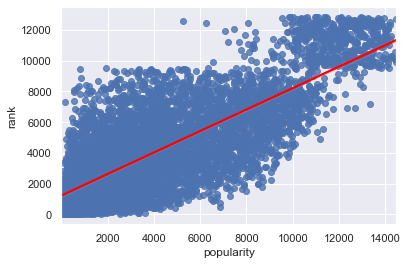

In [21]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [75]:
# anime_df sorted by rank
anime_sorted_rank_df = anime_df.sort_values(by=['rank'])
anime_sorted_rank_df

anime_id                                              title  \
1261      5114                   Fullmetal Alchemist: Brotherhood   
529      32281                                     Kimi no Na wa.   
639      28977                                           Gintama°   
2953     30484                                      Steins;Gate 0   
1475      9253                                        Steins;Gate   
...        ...                                                ...   
6575     19857  Kagachi-sama Onagusame Tatematsurimasu: Netora...   
6581      5054  Kojin Jugyou The Animation: Schoolgirl Ready f...   
6602      3050                                   Panchira Teacher   
6619     13595             Suki de Suki de, Suki de The Animation   
6663     37405                            Dokidoki Little Ooyasan   

                         title_english  \
1261  Fullmetal Alchemist: Brotherhood   
529                         Your Name.   
639                   Gintama Season 4   
2953                               NaN   
1475                       Steins;Gate   
...                                ...   
6575                               NaN   
6581                               NaN   
6602               Panty Flash Teacher   
6619                               NaN   
6663                               NaN   

                                         title_japanese  \
1261                         鋼の錬金術師 FULLMETAL ALCHEMIST   
529                                               君の名は。   
639                                                 銀魂°   
2953                                      シュタインズ・ゲート ゼロ   
1475                                        STEINS;GATE   
...                                                 ...   
6575               かがち様お慰め奉ります ~寝取られ村淫夜噺~ THE ANIMATION   
6581  個人授業 THE ANIMATION～Schoolgirl ready for a priv...   
6602                                         パンチラティーチャー   
6619                          好きで好きで, すきで THE ANIMATION   
6663                                    dokidokiりとる大家さん   

                                         title_synonyms  \
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
529                                                 NaN   
639                                Gintama&#039; (2015)   
2953                                   Steins,Gate Zero   
1475                                                NaN   
...                                                 ...   
6575                                                NaN   
6581                                       Kojin Jugyou   
6602                                                NaN   
6619                                                NaN   
6663                                                NaN   

                                              image_url   type        source  \
1261  https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
529   https://myanimelist.cdn-dena.com/images/anime/...  Movie      Original   
639   https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
2953  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
1475  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
...                                                 ...    ...           ...   
6575  https://myanimelist.cdn-dena.com/images/anime/...    OVA  Visual novel   
6581  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6602  https://myanimelist.cdn-dena.com/images/anime/...    OVA      Original   
6619  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6663  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Other   

      episodes            status  ...                  broadcast  \
1261        64   Finished Airing  ...     Sundays at 17:00 (JST)   
529          1   Finished Airing  ...                        NaN   
639         51   Finished Airing  ...  Wednesdays at 18:00 (JST)   
2953        23  Curre

In [74]:
# anime_df sorted by popularity
anime_sorted_popularity_df = anime_df.sort_values(by=['popularity'])
anime_sorted_popularity_df

anime_id                                              title  \
3802      1535                                         Death Note   
3897     16498                                 Shingeki no Kyojin   
3009     11757                                   Sword Art Online   
1261      5114                   Fullmetal Alchemist: Brotherhood   
4215     30276                                      One Punch Man   
...        ...                                                ...   
6648     37859  Free! Movie 2: Timeless Medley - Yakusoku: Cha...   
6644     37860    Free!: Take Your Marks: Character Butai Aisatsu   
6640     37814     Inazuma Eleven Reloaded: Reformation of Soccer   
6659     37493                              Watashitachi no Mirai   
6661     37494                             Chikyuu to no Yakusoku   

                         title_english  \
3802                        Death Note   
3897                   Attack on Titan   
3009                  Sword Art Online   
1261  Fullmetal Alchemist: Brotherhood   
4215                     One Punch Man   
...                                ...   
6648                               NaN   
6644                               NaN   
6640                               NaN   
6659                               NaN   
6661                               NaN   

                                title_japanese  \
3802                                     デスノート   
3897                                     進撃の巨人   
3009                              ソードアート・オンライン   
1261                鋼の錬金術師 FULLMETAL ALCHEMIST   
4215                                    ワンパンマン   
...                                        ...   
6648  劇場版 Free!-Timeless Medley- 約束 キャラクター舞台挨拶   
6644     特別版 Free!-Take Your Marks- キャラクター舞台挨拶   
6640             イナズマイレブン リローデッド ～サッカーの変革へんかく～   
6659                                    私たちの未来   
6661                                    地球との約束   

                                         title_synonyms  \
3802                                                 DN   
3897                                                AoT   
3009                                         S.A.O, SAO   
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
4215                  One Punch-Man, One-Punch Man, OPM   
...                                                 ...   
6648                                                NaN   
6644                                                NaN   
6640                                                NaN   
6659                                                NaN   
6661                                                NaN   

                                              image_url     type       source  \
3802  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3897  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3009  https://myanimelist.cdn-dena.com/images/anime/...       TV  Light novel   
1261  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
4215  https://myanimelist.cdn-dena.com/images/anime/...       TV    Web manga   
...                                                 ...      ...          ...   
6648  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6644  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6640  https://myanimelist.cdn-dena.com/images/anime/...  Special         Game   
6659  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   
6661  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   

      episodes           status  ...                  broadcast  \
3802        37  Finished Airing  ...  Wednesdays at 00:56 (JST)   
3897        25  Finished Airing  ...     Sundays at 01:58 (JST)   
3009        25  Finished Airing  ...     Sundays at 00:00 (JST)   
1261        64  Finished Airing  ...     Sundays at 17:00 (JST)   
4215        12  Finished Airing  ...     Mondays at 01

Because we are primarily concerned with how highly rated an anime is, we will be focussing on the rank of an anime. In the following section, it is further established that popular anime is generally high in rank.

#### **1.1.1** Correlation of Feature Variables

These are correlation tables for the quantatative variables that we will use for analysis.

anime_id  episodes    airing     score  scored_by      rank  \
anime_id         1.000000 -0.109610  0.223734 -0.223733  -0.046057  0.274671   
episodes        -0.109610  1.000000 -0.037289  0.076875   0.068544 -0.049064   
airing           0.223734 -0.037289  1.000000 -0.066910  -0.046482  0.100467   
score           -0.223733  0.076875 -0.066910  1.000000   0.381926 -0.898747   
scored_by       -0.046057  0.068544 -0.046482  0.381926   1.000000 -0.356686   
rank             0.274671 -0.049064  0.100467 -0.898747  -0.356686  1.000000   
popularity       0.205813 -0.009545  0.079229 -0.688492  -0.425719  0.777302   
members         -0.032301  0.079572 -0.030711  0.415626   0.987107 -0.391524   
favorites       -0.054066  0.106804 -0.004717  0.256094   0.793949 -0.208503   
duration_min    -0.205838 -0.105711 -0.086957  0.298989   0.046203 -0.294528   
aired_from_year  0.623290 -0.147920  0.142681  0.042159   0.110892 -0.063543   

                 popularity   members  favorites  duration_min  \
anime_id           0.205813 -0.032301  -0.054066     -0.205838   
episodes          -0.009545  0.079572   0.106804     -0.105711   
airing             0.079229 -0.030711  -0.004717     -0.086957   
score             -0.688492  0.415626   0.256094      0.298989   
scored_by         -0.425719  0.987107   0.793949      0.046203   
rank               0.777302 -0.391524  -0.208503     -0.294528   
popularity         1.000000 -0.474798  -0.210745     -0.159596   
members           -0.474798  1.000000   0.781565      0.039457   
favorites         -0.210745  0.781565   1.000000      0.002669   
duration_min      -0.159596  0.039457   0.002669      1.000000   
aired_from_year   -0.236951  0.135725   0.031254     -0.183812   

                 aired_from_year  
anime_id                0.623290  
episodes               -0.147920  
airing                  0.142681  
score                   0.042159  
scored_by               0.110892  
rank                   -0.063543  
popularity             -0.236951  
members                 0.135725  
favorites               0.031254  
duration_min           -0.183812  
aired_from_year         1.000000

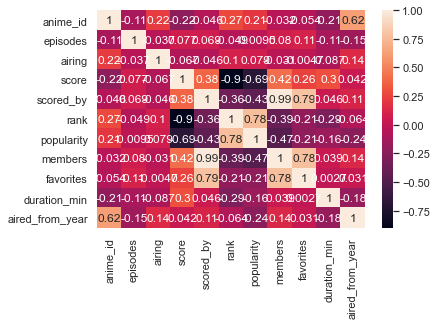

In [26]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(70,60)})
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution.

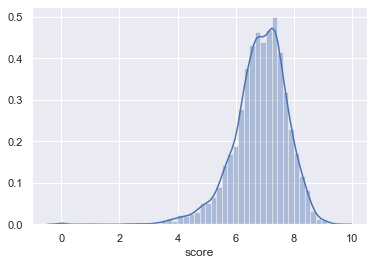

In [33]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [32]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Qualatative Variables
We want to visualize the categorical variables that can contribute to an anime's popularity. Although we cannot build models on categorical variables, it is helpful to visualize what factors contribute to an anime's popularity currently.

Here, we see the distribution and means of the categorical variables that I think have the most impact on an anime's popularity, which are:
1. Genre
2. Production Studio
3. Year of Airing
4. Name of Anime

Note that the Name of Anime categorical variable depends on the viewer Animelists and ratings, which will require merging `anime_df` and `animelist_df`.

#### **1.3.1** Genres
TODO: description of genres

TODO: genres

In [ ]:
# boxplot of mean scores per genre
# TODO
sb.set(style="whitegrid")
ax = sb.boxplot(x='genre', y='score', data=anime_df)

In [107]:
# mean rank per genre
# TODO

#### **1.3.2** Production Studio
TODO: description of genres

In [68]:
# boxplot of mean scores per studio
# NOTE: click on image to enlarge for detailed view
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(700,60)})
ax = sb.boxplot(x='studio', y='score', data=anime_df)

In [99]:
# sorted by the highest ranked production studio
anime_studio_means = anime_df[['rank','studio']].groupby(['studio']).mean()
anime_studio_means = anime_studio_means.sort_values(by=['rank'])
anime_studio_means

rank
studio                                
Artland, Magic Bus                 6.0
J.C.Staff, Egg Firm               65.5
Studio Chizu                      68.0
Madhouse, Satelight, Graphinica   92.0
Xebec, AIC                       131.0
...                                ...
Sugar Boy, Blue Cat                NaN
Suzuki Mirano                      NaN
T-Rex                              NaN
Triple X                           NaN
Y.O.U.C                            NaN

[711 rows x 1 columns]

In [106]:
# number of anime produced by each studio
anime_year_counts = anime_df[['rank', 'studio']].groupby(['studio']).count()
anime_year_counts = anime_year_counts.sort_values(['rank'], ascending=False)
anime_year_counts

rank
studio                   
Toei Animation        403
Sunrise               277
Madhouse              241
Studio Pierrot        235
J.C.Staff             231
...                   ...
Chippai                 0
Circle Tribute          0
Majin                   0
Collaboration Works     0
Media Bank              0

[711 rows x 1 columns]

In [69]:
# distribution of number of anime produced by each production studio
# TODO

From the boxplot above, we can see that some studios produce anime that is more highly rated. As such, our modelling should include the studio as a categorical variable.

#### **1.3.3** Airing Year
The airing year refers to the year that the anime is released. Anime may have differing popularities depending on recency, and the following EDA serves to provide some analysis as to whether airing date affects rank or not.

In [70]:
# boxplot of mean scores per year
# NOTE: click on image to enlarge for detailed view
sb.set(rc={'figure.figsize':(300,60)})
ax = sb.boxplot(x='aired_from_year', y='score', data=anime_df)

In [ ]:
# distribution of number of scores per airing year
# TODO

In [96]:
# sorted by the highest ranked airing years
anime_year_means = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).mean()
anime_year_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_year_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

In [100]:
# number of anime aired in each year
anime_year_counts = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).count()
anime_year_counts

rank
aired_from_year      
1942.0              1
1943.0              2
1944.0              1
1945.0              1
1957.0              1
...               ...
2014.0            403
2015.0            463
2016.0            546
2017.0            496
2018.0            191

[66 rows x 1 columns]

From the outputs of the box plots and the sorting by rank, it appears that there is not a significant impact of airing day on popularity. Thus, we will not be using airing date as a categorical variable in our analysis.

#### **1.3.4** Source

Source refers to the original source for the given anime (ie. the anime that the source was adapted from).

In [ ]:
sb.set(rc={'figure.figsize':(200,60)})
ax = sb.boxplot(x='source', y='score', data=anime_df)

In [ ]:
# sorted by the highest ranked sources
anime_source_means = anime_df[['rank', 'source']].groupby(['source']).mean()
anime_source_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_source_means

### **1.4** Title Frequency

This is for evaluation of ratings per title by users per anime title.

In [112]:
# sb.set(rc={'figure.figsize':(800,60)})
# ax = sb.boxplot(x='title', y='score', data=merged_anime_df)

KeyboardInterrupt: 

## **2.** Feature Selection/Extraction

**notes:**
* sort by popularity

for reference, the columns are:

['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year']

### **2.1** Dropping Uncessary Categorical Variables

In [92]:
# dropping uncessary features
# new_anime_df = merged_anime_df.groupby(['source'])
new_anime_df = merged_anime_df[['anime_id', 'username', 'title', 'score', 'scored_by', 'rank', 'popularity', 'members', 'source', 'favorites', 'studio', 'genre', 'aired_from_year']]
new_anime_df

### **2.2** Encoding Categorical Variables

We have to encode the categorical variables also going to be used for our analysis. This includes:
* Genre
* Studio
* Title of Anime

In [91]:
# studio
encoder = LabelEncoder()
studio_labels = encoder.fit_transform(new_anime_df['studio'])

# mappings
studio_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
studio_mappings # from the output, there are 710 studios in total

{0: '10Gauge',
 1: '2:10 Animation',
 2: '8bit',
 3: 'A-1 Pictures',
 4: 'A-1 Pictures, Bridge',
 5: 'A-1 Pictures, CloverWorks',
 6: 'A-1 Pictures, Ordet',
 7: 'A-1 Pictures, TROYCA',
 8: 'A-1 Pictures, Trigger, CloverWorks',
 9: 'A-Line',
 10: 'A-Real',
 11: 'A.C.G.T.',
 12: 'ACC Production',
 13: 'AIC',
 14: 'AIC A.S.T.A.',
 15: 'AIC Build',
 16: 'AIC Classic',
 17: 'AIC Frontier',
 18: 'AIC Plus+',
 19: 'AIC Spirits',
 20: 'AIC Spirits, Asread',
 21: 'AIC Spirits, BeSTACK',
 22: 'AIC Spirits, Digital Frontier',
 23: 'AIC Spirits, Group TAC',
 24: 'AIC Takarazuka',
 25: 'AIC, APPP',
 26: 'AIC, Animate Film',
 27: 'AIC, Artmic',
 28: 'AIC, Artmic, Animate Film',
 29: 'AIC, Artmic, Darts',
 30: 'AIC, BeSTACK',
 31: 'AIC, Darts',
 32: 'AIC, Remic',
 33: 'AIC, Studio Hakk',
 34: 'APPP',
 35: 'AT-2',
 36: 'AXsiZ',
 37: 'Actas',
 38: 'Actas, Bee Media',
 39: 'Actas, Brain&#039;s Base',
 40: 'Actas, Studio 3Hz',
 41: 'Actas, SynergySP',
 42: 'Actas, TMS Entertainment',
 43: 'Agent 21',
 44

In [ ]:
# source
source_labels = encoder.fit_transform(new_anime_df['source'])

# mappings
source_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
source_mappings

In [ ]:
# title
title_labels = encoder.fit_transform(new_anime_df['title'])

# mappings
title_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
title_mappings

### **2.3** Score Threshold

#### **2.3.1** Updated Correlations

In [ ]:
# updated correlation heatmap based on feature variables
updated_anime_corr = new_anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(70,60)})
sb.heatmap(updated_anime_corr, annot=True)

# correlation matrix
updated_anime_corr

#### **2.3.2** Score Mean Threshold

Because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`, added to `new_anime_df`.

In [ ]:
new_anime_df['score'].mean()